In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [2]:
X = pd.read_csv('wine-clustering.csv')
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Handling the missing values
X.fillna(method ='ffill', inplace = True)
  
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [5]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.832433 -0.318834
1 -0.639443  0.091947
2 -0.756882 -0.243317
3 -0.805447 -0.510057
4 -0.373903 -0.311604


In [6]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 5).fit(X_principal)
labels = db_default.labels_

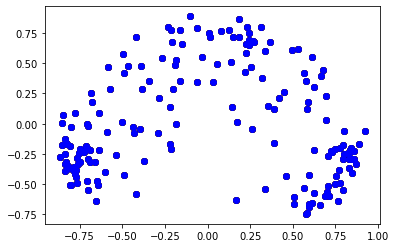

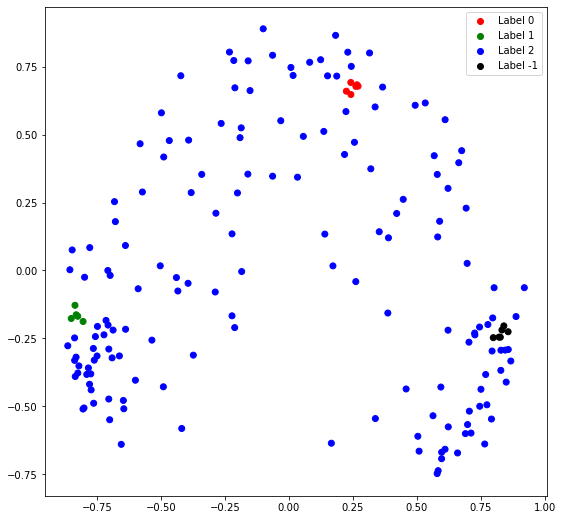

In [7]:
# Building the label to colour mapping
colours = {}
colours[0] = 'g'
colours[1] = 'r'
colours[2] = 'k'
colours[-1] = 'b'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((g, r, k, b), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

In [8]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal)
labels1 = db.labels_

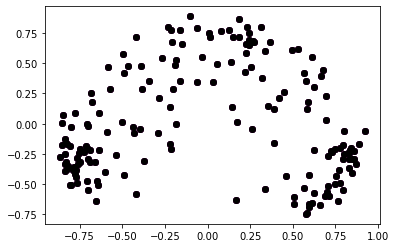

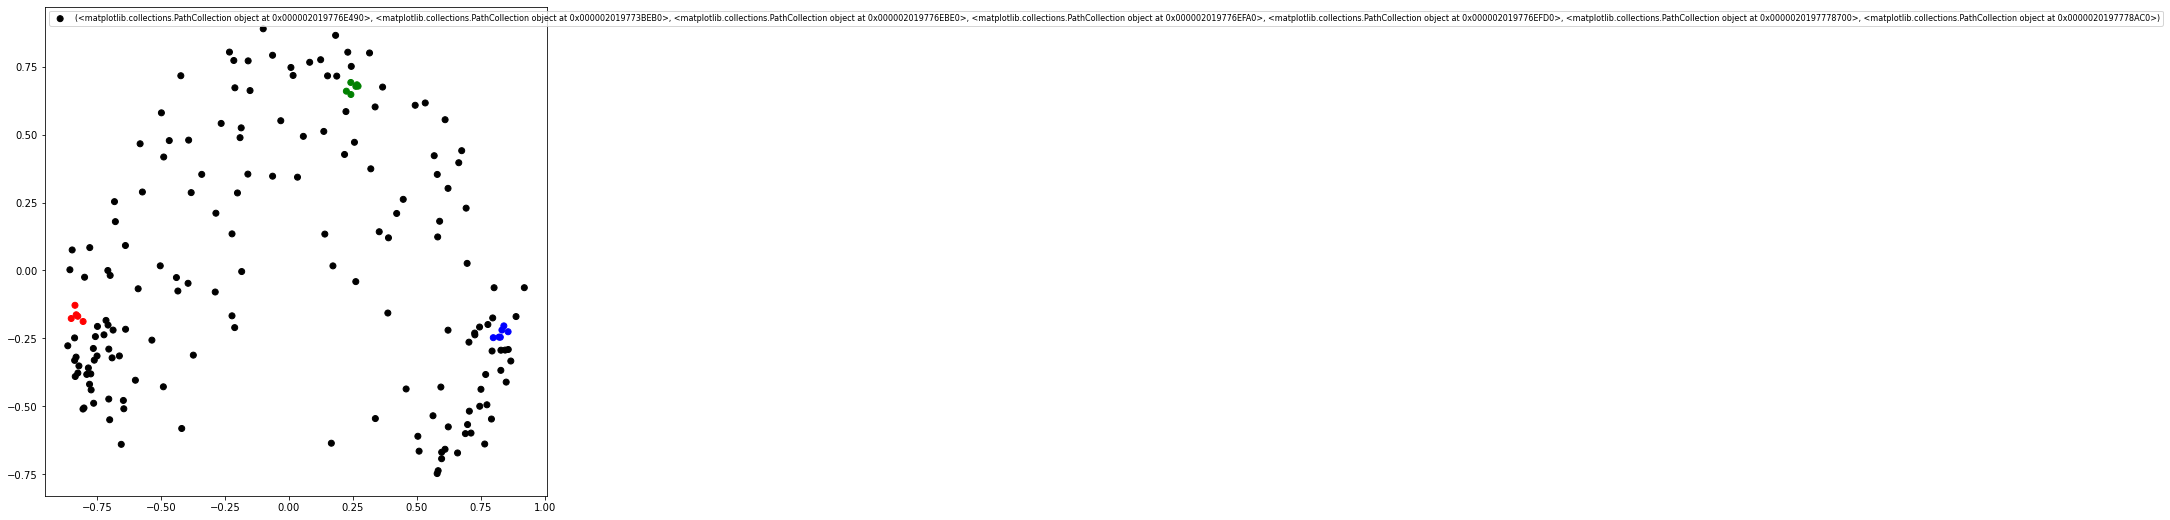

In [9]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
  
r = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend(((r, g, b, c, y, m, k),
           'Label 0', 'Label 1', 'Label 2', 'Label 3','Label 4',
            'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()